<a href="https://colab.research.google.com/github/Conor-Luppnow/Aromaticity-Classification/blob/master/FinalProj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Code to install necessary libraries and perform authorization

"""
When you run this code, you will be asked to authenticate which can be done by 
clicking the click outputed and copy pasting the access code. Sometime you have to do this couple of time to gain access

If you ran this code after successful authentication during your session,
when asked for verification code without any link to browser, enter your google password
"""

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.21-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
## Mount google drive 

!mkdir -p drive 
!google-drive-ocamlfuse drive

In [0]:
## Create a folder called "testing"(any name you want )

## Setting the working directory
import os
os.chdir("drive/Colab_Notebooks/Project3")

In [4]:
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 36kB/s 
     |████████████████████████████████| 512kB 50.4MB/s 
     |████████████████████████████████| 3.8MB 51.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=88abf8dc26ba919d64d886df7d8912bfd895b940e1e07b4703dd08765d978087
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2

In [0]:

import cv2                 
                
from random import shuffle 
from tqdm import tqdm      

train_directory = '/content/drive/Colab_Notebooks/Project3/batch_2_train'
IMG_SIZE = 300 # all my images are 300x300






In [0]:
def label_img(img):
    word_label = img.split('.')[-3] # all my names have "ya.<cid> or na.<cid>" where na is not aromatic and ya is aromatic, the CID is just a number from where I got the data
    
    if word_label == 'na': return [1,0] # not aromatic
                           
    elif word_label == 'ya': return [0,1] # aromatic

In [0]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(train_directory)):
        label = label_img(img)
        path = os.path.join(train_directory,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [0]:
import numpy as np

In [9]:
train_data = create_train_data()


100%|██████████| 1227/1227 [08:20<00:00,  2.45it/s]


In [10]:

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation
model = tf.keras.models.Sequential()

model.add(Conv2D(32, kernel_size=5, padding="same",input_shape=(300, 300, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu'))
model.add(Conv2D(128, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(32, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'  ))
model.add(Dropout(0.1))

model.add(Dense(units=256, activation='relu'  ))
model.add(Dropout(0.1))

model.add(Dense(2))
model.add(Activation("softmax"))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
a= len(train_data)
print(a)
b = len(train_data)*.7
print(b)

1227
858.9


In [0]:
train = train_data[:920]
test = train_data[921:]

In [0]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]


Y=np.array(Y)

x_test = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_test = [i[1] for i in test]

y_test = np.array(y_test)


In [14]:
print(X.shape)

(920, 300, 300, 1)


In [0]:
from keras.callbacks import ModelCheckpoint
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [32]:
#Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 73, 73, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0

In [33]:
#Input the training data and the validation data
#Also save the history for looking at the model over epochs
hist = model.fit(X, Y, epochs=20, batch_size=60,verbose=1, validation_data = (x_test, y_test), validation_steps=5, callbacks=callbacks_list)

Train on 920 samples, validate on 306 samples
Epoch 1/20
900/920 [============================>.] - ETA: 0s - loss: 0.1818 - acc: 0.9733
Epoch 00001: val_acc improved from -inf to 0.62745, saving model to weights-improvement-01-0.6275.hdf5
920/920 [==============================] - 7s 7ms/sample - loss: 0.1790 - acc: 0.9728 - val_loss: 4.8101 - val_acc: 0.6275
Epoch 2/20
900/920 [============================>.] - ETA: 0s - loss: 0.0815 - acc: 0.9800
Epoch 00002: val_acc improved from 0.62745 to 0.65033, saving model to weights-improvement-02-0.6503.hdf5
920/920 [==============================] - 7s 8ms/sample - loss: 0.0797 - acc: 0.9804 - val_loss: 6.7533 - val_acc: 0.6503
Epoch 3/20
900/920 [============================>.] - ETA: 0s - loss: 0.0729 - acc: 0.9911
Epoch 00003: val_acc did not improve from 0.65033
920/920 [==============================] - 4s 4ms/sample - loss: 0.0713 - acc: 0.9913 - val_loss: 4.5766 - val_acc: 0.6111
Epoch 4/20
900/920 [============================>.] -

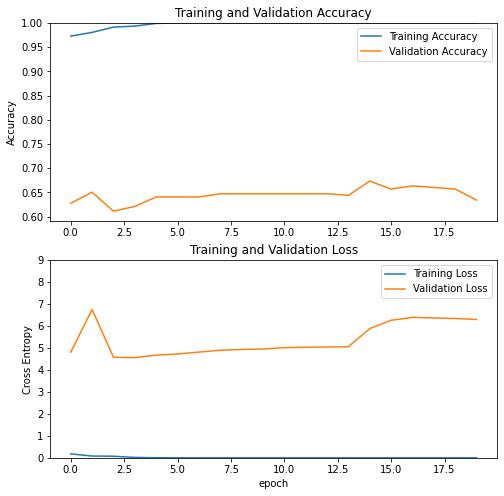

In [34]:
import matplotlib.pyplot as plt

#Plot the accuracy and loss over the epochs
acc = hist.history['acc']
val_acc = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,9.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()



In [0]:
weight_name = "weights-improvement-15-0.6732.hdf5"
model.load_weights(weight_name)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print("loss: " + str(val_loss))
print("accuracy: " + str(val_acc))

306/306 [==============================] - 1s 2ms/sample - loss: 5.8846 - acc: 0.6732
loss: 5.88464585784214
accuracy: 0.67320263


In [60]:
print("Done")

Done
